In [1]:
%load_ext autoreload
%autoreload 2

import cstrees.cstree as ct
import numpy as np
import networkx as nx
import itertools
# CStree from Figure 1 in (Duarte & Solus, 2022)
np.random.seed(1)


In [2]:
p=4
co = ct.CausalOrder(range(1, p+1))
tree = ct.CStree(co)
cards = [2] * p

#stage = ct.sample_random_stage(cards,2)
#stage.set_random_params(cards)

tree.set_cardinalities([None] + cards)

# These do not have to be in a dict like this as the levels are
# determined from the length of the tuples.

tree.add_stages({
    0: [],
    1: [],
    2: [ct.Stage([[0, 1], 0])],    # Green
    3: [ct.Stage([0, [0, 1], 0]),  # Blue
        ct.Stage([0, [0, 1], 1]),  # Orange
        ct.Stage([1, [0, 1], 0])]  # Red
})

tree.set_random_stage_parameters()


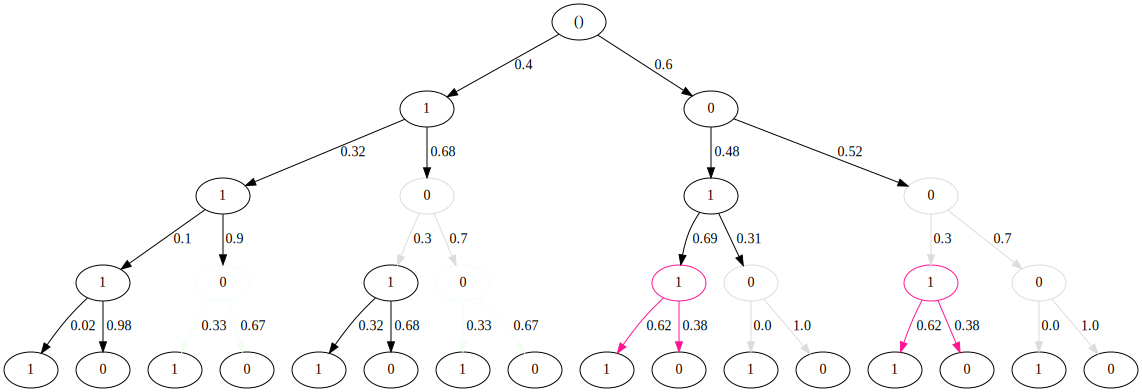

In [3]:
a = tree.plot()
#a.draw("testplot.png")

x = tree.sample(5)
# print(x)
a

In [4]:
rels = tree.csi_relations()
print("Initial rels")
print(rels)
graphs = ct.csi_relations_to_dags(rels, co)

i = 1
for key, graph in graphs.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    agraph.draw(str(key) + "_csi.png", args='-Glabel="'+str(key)+'"   ')
    i += 1


0 []
1 []
2 [<cstrees.cstree.Stage object at 0x7f78a764ee50>]
3 [<cstrees.cstree.Stage object at 0x7f78a639cc70>, <cstrees.cstree.Stage object at 0x7f78a639ca90>, <cstrees.cstree.Stage object at 0x7f78a639ca00>]
Initial rels
{<cstrees.cstree.Context object at 0x7f78a6256df0>: [<cstrees.cstree.CSI_relation object at 0x7f78a6256d90>], <cstrees.cstree.Context object at 0x7f78a63cb520>: [<cstrees.cstree.CSI_relation object at 0x7f78a63cbeb0>], <cstrees.cstree.Context object at 0x7f78a63cbaf0>: [<cstrees.cstree.CSI_relation object at 0x7f78a63cbac0>], <cstrees.cstree.Context object at 0x7f78a63cbfd0>: [<cstrees.cstree.CSI_relation object at 0x7f78a63cbf10>]}


In [9]:
rels = tree.csi_relations_per_level()
rels

{0: [],
 1: [],
 2: [<cstrees.cstree.CSI_relation at 0x7f78a62562e0>],
 3: [<cstrees.cstree.CSI_relation at 0x7f78a5142e20>,
  <cstrees.cstree.CSI_relation at 0x7f78a5142a00>]}

In [23]:
paired_csis = ct.csis_by_levels_2_by_pairs(rels)
paired_csis

[{},
 {},
 {(1, 3): [[None, None, {0}, None]]},
 {(2, 4): [[None, {0}, None, {0}, None],
   [None, {0}, None, {1}, None],
   [None, {1}, None, {0}, None]]}]

In [37]:
minl_csislists = ct.minimal_csis(paired_csis, cards)
minl_csislists

[{},
 {},
 {(1, 3): [[None, None, {0}, None]]},
 {(2, 4): [[None, {0, 1}, None, {0}, None], [None, {0}, None, {0, 1}, None]]},
 {}]

In [24]:

print("ret")
print(ret)
for l, csilist in enumerate(ret):
    print("level {} {}:".format(l, csilist))

print(p)
co = ct.CausalOrder(range(1, p+1))
tree = ct.CStree(co)
cards = [2] * p


tree.set_cardinalities([None] + cards)

# These do not have to be in a dict like this as the levels are
# determined from the length of the tuples.

rels_at_level = stages
#print(stages)

    
# tree.add_stages(stages)

# tree.set_random_stage_parameters()

# a = tree.plot()
# a.draw("minlcsi.png")

#rels = tree.csi_relations_per_level()
print(rels_at_level)

# TODO: The keys should be contexts here, not levels.


print(rels)


ret


NameError: name 'ret' is not defined

In [39]:
minl_csislists

[{},
 {},
 {(1, 3): [[None, None, {0}, None]]},
 {(2, 4): [[None, {0, 1}, None, {0}, None], [None, {0}, None, {0, 1}, None]]},
 {}]

In [40]:
minl_csis = ct.csi_lists_to_csis_by_level(minl_csislists, p)

{}
{}
(1, 3)
[None, None, {0}, None]
X1 ⊥  X3, X2=0
{(1, 3): [[None, None, {0}, None]]}
(2, 4)
[None, {0, 1}, None, {0}, None]
X2 ⊥ X4 | X1, X3=0
[None, {0}, None, {0, 1}, None]
X2 ⊥ X4 | X3, X1=0
{(2, 4): [[None, {0, 1}, None, {0}, None], [None, {0}, None, {0, 1}, None]]}
{}


In [41]:
minl_csis_by_context = ct.rels_by_level_2_by_context(minl_csis)

In [42]:
minl_csis_by_context

{<cstrees.cstree.Context at 0x7f78a4649df0>: [<cstrees.cstree.CSI_relation at 0x7f78a4649d60>],
 <cstrees.cstree.Context at 0x7f78a4653d90>: [<cstrees.cstree.CSI_relation at 0x7f78a4653ee0>],
 <cstrees.cstree.Context at 0x7f78a4653dc0>: [<cstrees.cstree.CSI_relation at 0x7f78a4653eb0>]}

In [44]:
# rels = {Context: csis}

rels_by_context = ct.rels_by_level_2_by_context(minl_csis_by_context)
cdags = ct.csi_relations_to_dags(rels_by_context, co)

for key, graph in cdags.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    print(key)
    agraph.draw("minl_cont_dag_"+str(key) + ".png", args="-Glabel="+str(key)+"    ")



X2=0
X3=0
X1=0
